In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['font.family']='AppleGothic' #MalgunGothic
rcParams['figure.figsize']=17,8

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("업종별__내역별_식품접객업체_감시_및_위반현황_20230517161028.csv", encoding='cp949')

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   시점           277 non-null    int64 
 1   업종별(1)       277 non-null    object
 2   감시및위반현황별(1)  277 non-null    object
 3   감시및위반현황별(2)  277 non-null    object
 4   데이터          277 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.9+ KB


,시점,업종별(1),감시및위반현황별(1),감시및위반현황별(2),데이터
0,2018,총계,감시,소계,581443
1,2018,총계,위반내용,소계,30509
2,2018,총계,위반내용,시설위반,5815
3,2018,총계,위반내용,보존 및 유통기준위반,879
4,2018,총계,위반내용,건강진단등 개인위생,3611
...,...,...,...,...,...
272,2021,위탁급식영업,위반내용,청소년불법고용 출입등,-
273,2021,위탁급식영업,위반내용,퇴폐영업,-
274,2021,위탁급식영업,위반내용,위생적 취급기준,12
275,2021,위탁급식영업,위반내용,영업자준수사항,29


In [5]:
keywords=['위탁급식영업','총계']
pattern = '|'.join(keywords)
df=df[df['업종별(1)'].str.contains(pattern)]

In [6]:
keywords=['위생적 취급기준','보존 및 유통기준위반','시설위반']
pattern2 = '|'.join(keywords)
df=df[df['감시및위반현황별(2)'].str.contains(pattern2)]

In [8]:
df = df[~df['데이터'].str.contains('-')]

<AxesSubplot:xlabel='시점', ylabel='데이터'>

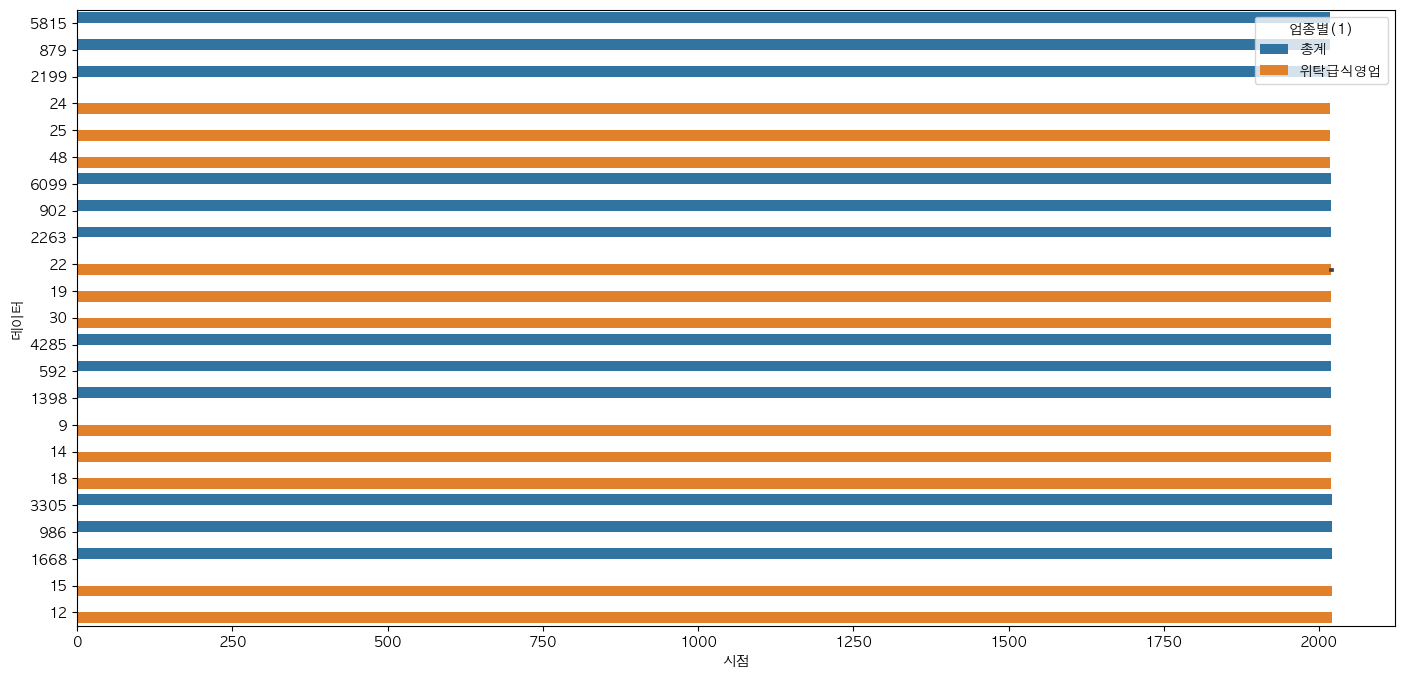

In [13]:
sns.barplot(data=df, x='시점', y='데이터', hue='업종별(1)')